In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Retrieve clustering data from github, load training dataset
!wget = https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv
data = pd.read_csv('clusters.csv')
data

--2022-12-20 03:06:12--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-12-20 03:06:12--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56935 (56K) [text/plain]
Saving to: ‘clusters.csv’

clusters.csv        100%[===================>]  55.60K  --.-KB/s    in 0.01s   

2022-12-20 03:06:13 (3.82 MB/s) - ‘clusters.csv’ saved [56935/56935]

FINISHED --2022-12-20 03:06:13--
Total wall clock time: 0.6s
Downloaded: 1 files, 56K in 0.01s (3.82 MB/s)


,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091
...,...,...,...
995,1.035455,1.916280,1.535641
996,3.479744,3.747277,3.038687
997,2.422571,1.771780,1.729732
998,-0.237440,-0.029278,0.077298


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize numeric features
normalized_features = MinMaxScaler().fit_transform(data)

# Get principal components
pca = PCA(n_components=2).fit(normalized_features)
features_2d = pca.transform(normalized_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

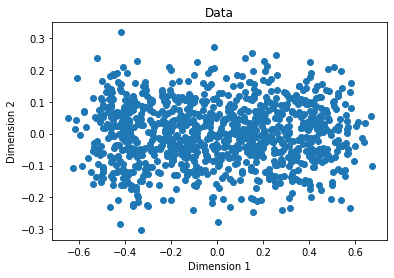

In [4]:
# Visualize Data Points
import matplotlib.pyplot as plt

%matplotlib inline

# Plot graph
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

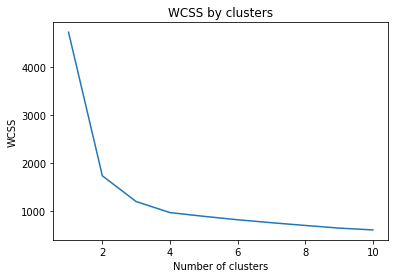

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create models with 1 to 10 clusters 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('WCSS by clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
from sklearn.cluster import KMeans

model = KMeans(4, init='k-means++',n_init=500, max_iter=1000)
km_clusters = model.fit_predict(data)
km_clusters

array([1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 3, 2, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 3, 1, 2, 0, 2, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 2,
       3, 1, 1, 3, 3, 0, 1, 2, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 2, 3, 0, 2, 0, 3, 0, 3, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 3,
       0, 2, 1, 1, 2, 3, 2, 3, 1, 2, 0, 2, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 3, 3, 0, 3, 0, 0, 3, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 3, 3, 0, 2, 2, 1, 1, 3, 1, 2, 0, 3, 0, 2,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 3, 1, 3, 3, 2, 2, 1, 2, 0, 3, 2, 0, 0,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 1, 3, 3, 2, 1, 3, 0, 0, 3, 1, 3,
       0, 1, 2, 3, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 3, 3, 1, 3, 2, 3, 2,
       3, 0, 0, 2, 3, 1, 1, 0, 3, 0, 2, 2, 3, 3, 3, 1, 3, 1, 0, 3, 3, 0,
       1, 0, 2, 2, 2, 0, 3, 1, 0, 2, 1, 2, 3, 0, 0, 1, 3, 3, 2, 1, 1, 3,
       3, 2, 3, 1, 1, 2, 1, 3, 3, 3, 0, 0, 2, 1, 3,

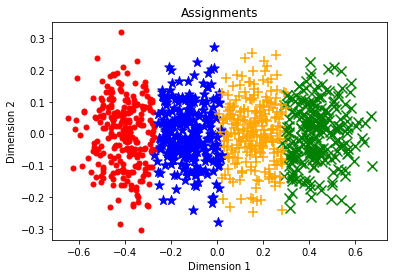

In [7]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)